# HOME10

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# SLIDE (1) Вероятностные связи

Реализовать критерии неперсонализированных рекомендаций.

$ supp(X) = \frac{|\{X\subset{T}\}|}{|T|}$ - априорная вероятность, $T$ - все множество объектов

$ conf(X->Y)=\frac{supp(X\cup{Y})}{supp(X)}$ - условная веротяность продукта $Y$ при условии корзины $X$

$ Lift(X->Y)=\frac{supp(X\cup{Y})}{supp(X)*supp(Y)}$ - уровень `связи` продуктов

In [ ]:
def support(df, X: list):
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    pass

def confidence(df, X: list, Y: list):
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    pass

def lift(df, X: list, Y: list):
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    pass

In [22]:
def support(df, X: list):
    mask = 1
    for product in X:
        mask = mask & (df[product] == 1)
    return len(df[mask]) / len(df) 

def confidence(df, X: list, Y: list):
    b = support(df, X)
    if b == 0:
        return 0
    
    return support(df, X + Y) / support(df, X)

def lift(df, X: list, Y: list):
    a = support(df, X)
    b = support(df, Y)
    
    return support(df, X + Y) / a / b

In [24]:
df = pd.DataFrame({
    'transaction_id': list(range(5)),
    'milk': [1, 0, 0, 1, 0],
    'bread': [1, 0, 0, 1, 1],
    'butter': [0, 1, 0, 1, 0],
    'beer': [0, 0, 1, 0, 0],
    'diapers': [0, 0, 1, 0, 0]})



assert support(df, ['milk']) == 0.4
assert support(df, ['butter', 'bread']) == 0.2

assert confidence(df, ['bread', 'butter'], ['milk']) == 1 # правило корректно в 100% случаев
assert confidence(df, ['butter'], ['bread']) == 0.5 # правило срабатывает в 50% случаев

assert lift(df, ['milk', 'bread'], ['butter']) == 1.25

# SLIDE (1) Метрики рекомендаций

# SLIDE (1) User-content-based

In [ ]:
Необходимо 

In [51]:
anime_data=pd.read_csv('10-Special/data/anime.csv')
rating_data=pd.read_csv('10-Special/data/rating.csv')
## print shape of dataset with rows and columns and information 
print ("The shape of the  data is (row, column):"+ str(anime_data.shape))
print (anime_data.info())

The shape of the  data is (row, column):(12294, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None


In [52]:
anime_fulldata=pd.merge(anime_data,rating_data,on='anime_id',suffixes= ['', '_user'])
anime_fulldata = anime_fulldata.rename(columns={'name': 'anime_title', 'rating_user': 'user_rating'})
anime_fulldata.head()

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


In [53]:
anime_feature=anime_fulldata.copy()
anime_feature["user_rating"].replace({-1: np.nan}, inplace=True)
anime_feature.head()


,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,NaN


In [54]:
anime_feature = anime_feature.dropna(axis = 0, how ='any') 
anime_feature.isnull().sum()

anime_id       0
anime_title    0
genre          0
type           0
episodes       0
rating         0
members        0
user_id        0
user_rating    0
dtype: int64

In [55]:
counts = anime_feature['user_id'].value_counts()
anime_feature = anime_feature[anime_feature['user_id'].isin(counts[counts >= 200].index)]

In [56]:
anime_feature

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0
7,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,462,8.0
11,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,598,10.0
14,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,784,9.0
...,...,...,...,...,...,...,...,...,...
7813713,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211,58483,1.0
7813716,5543,Under World,Hentai,OVA,1,4.28,183,49503,4.0
7813717,5543,Under World,Hentai,OVA,1,4.28,183,58483,1.0
7813720,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219,49503,6.0


In [57]:
anime_pivot=anime_feature.pivot_table(index='anime_title',columns='user_id',values='user_rating').fillna(0)

In [58]:
anime_pivot.head()

user_id,5,7,17,38,43,46,123,129,139,160,...,73406,73417,73422,73457,73460,73476,73499,73502,73503,73507
anime_title,,,,,,,,,,,,,,,,,,,,,
&quot;0&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Memoire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Movie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
&quot;Eiji&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
from scipy.sparse import csr_matrix

anime_matrix = csr_matrix(anime_pivot.values)

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(anime_matrix)


NearestNeighbors(algorithm='brute', metric='cosine')

In [60]:
query_index

2710

In [71]:
anime_data[anime_data['name'].str.contains('Naruto')]

,anime_id,name,genre,type,episodes,rating,members
486,28755,Boruto: Naruto the Movie,"Action, Comedy, Martial Arts, Shounen, Super P...",Movie,1,8.03,74690
615,1735,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,Unknown,7.94,533578
719,16870,The Last: Naruto the Movie,"Action, Martial Arts, Romance, Shounen, Super ...",Movie,1,7.88,85013
784,13667,Naruto: Shippuuden Movie 6 - Road to Ninja,"Action, Adventure, Martial Arts, Shounen, Supe...",Movie,1,7.84,87369
841,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1103,32365,Boruto: Naruto the Movie - Naruto ga Hokage ni...,"Action, Comedy, Martial Arts, Shounen, Super P...",Special,1,7.68,16868
1237,10589,Naruto: Shippuuden Movie 5 - Blood Prison,"Action, Adventure, Martial Arts, Mystery, Shou...",Movie,1,7.62,75660
1343,10075,Naruto x UT,"Action, Comedy, Martial Arts, Shounen, Super P...",OVA,1,7.58,23465
1472,8246,Naruto: Shippuuden Movie 4 - The Lost Tower,"Action, Comedy, Martial Arts, Shounen, Super P...",Movie,1,7.53,84527
1573,6325,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,"Action, Comedy, Martial Arts, Shounen, Super P...",Movie,1,7.50,83515


In [66]:
[x for x in anime_pivot.index if 'Naruto' in x]

['Boruto: Naruto the Movie',
 'Boruto: Naruto the Movie - Naruto ga Hokage ni Natta Hi',
 'Naruto',
 'Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shinobu Houjou Dattebayo!',
 'Naruto Movie 2: Dai Gekitotsu! Maboroshi no Chiteiiseki Dattebayo!',
 'Naruto Movie 3: Dai Koufun! Mikazuki Jima no Animaru Panikku Dattebayo!',
 'Naruto Narutimate Hero 3: Tsuini Gekitotsu! Jounin vs. Genin!! Musabetsu Dairansen taikai Kaisai!!',
 'Naruto SD: Rock Lee no Seishun Full-Power Ninden',
 'Naruto Shippuuden: Shippuu! &quot;Konoha Gakuen&quot; Den',
 'Naruto Shippuuden: Sunny Side Battle',
 'Naruto Soyokazeden Movie: Naruto to Mashin to Mitsu no Onegai Dattebayo!!',
 'Naruto x UT',
 'Naruto: Akaki Yotsuba no Clover wo Sagase',
 'Naruto: Dai Katsugeki!! Yuki Hime Shinobu Houjou Dattebayo! Special: Konoha Annual Sports Festival',
 'Naruto: Honoo no Chuunin Shiken! Naruto vs. Konohamaru!!',
 'Naruto: Shippuuden Movie 1',
 'Naruto: Shippuuden Movie 2 - Kizuna',
 'Naruto: Shippuuden Movie 3 - Hi no Ishi wo Ts

In [73]:
query_index = 20
print(query_index)
distances, indices = model_knn.kneighbors(anime_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

20


In [74]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(anime_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, anime_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for 001:

1: Nouryou Anime: Denkyuu Ika Matsuri, with distance of 0.47640392679747157:
2: Present Made no Michinori, with distance of 0.5093431251614213:
3: ◯, with distance of 0.5382052942695731:
4: Aki no Puzzle, with distance of 0.5456486266814584:
5: Chagama Ondo, with distance of 0.5924827202863896:


# SLIDE (1) 

# SLIDE (1) Экспоненциальное среднее

# SLIDE (1) Временная кроссвалидация

# SLIDE (1) Инвестор Кирилл

# SLIDE (2) K-MEANS

Нужно реализовать свой K-means.

В `init` устанавливается кол-во кластеров

В `fit` происходит цикл обучения:

1. Выбор $k$ центральных точек (первый раз произвольно)

2. Ищем расстояния каждой точки выборки до всех центров

3. Разбиваем все точки на множества по признаку расстояния до ближайшего центра (тот центр что ближе по евклидовой метрике, тот кластер и выбираем)

4. Обозначаем новые центры, как среднюю точку получившихся кластеров

5. Если новые центры не сильно отличаются (сумма расстояний между соответствующими центрами не превышает `1e-3`), то заканиваем цикл, иначе повторяем цикл с шага 2 с новыми центрами

# TASK

In [ ]:
class KMeans():
    def __init__(self, clusters=2):
        self.clusters_ = clusters
        self.labels_
    
    def fit(self, X: np.array):
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        return self

In [125]:
from numpy.linalg import norm

class KMeans():
    def __init__(self, clusters=2):
        self.clusters_ = clusters
    
    def _update_centers(self, X, centers):
        distance = norm(X[:,np.newaxis,:] - centers, axis=2)

        labels = np.argmin(distance, axis=1)
        
        one_hot_targets = np.eye(len(centers),dtype=np.int64)[labels]
        counts = one_hot_targets.sum(axis=0)
        new_centers = ((X[:,np.newaxis,:] * one_hot_targets[:,:,np.newaxis]).T.sum(axis=2) / counts).T
        return new_centers, labels

    
    def fit(self, X: np.array):
        self.X = X
        
        centers_idx = np.random.choice(np.arange(len(self.X)), self.clusters_)
        
        centers = self.X[centers_idx]
        
        new_centers, labels = self._update_centers(self.X, centers)
        
        while norm(new_centers - centers, axis=1).sum() > 1e-3:
            centers = new_centers
            new_centers, labels = self._update_centers(self.X, centers)
        
        self.labels_ = labels
        
        return self

In [225]:
N = 300

X1 = np.random.randn(N,2) + np.array([ 3, 3])
X2 = np.random.randn(N,2) + np.array([-3,-3])
X3 = np.random.randn(N,2) + np.array([-3, 3])
X4 = np.random.randn(N,2) + np.array([ 3,-3])

X = np.vstack([X1, X2, X3, X4])

model = KMeans(4)

model.fit(X)
labels = model.labels_

answer = labels.reshape((4,300)).mean(axis=1)

answer.sort()

assert np.abs(answer[0] - 0) < 1e-2
assert np.abs(answer[1] - 1) < 1e-2
assert np.abs(answer[2] - 2) < 1e-2
assert np.abs(answer[3] - 3) < 1e-2

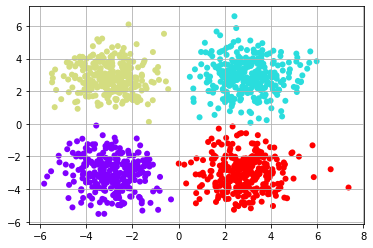

In [229]:
plt.scatter(X[:,0],X[:,1], c = labels, cmap='rainbow', edgecolors= 'none')
plt.grid()

# SLIDE (1) DBSCAN

В этом задании необходимо реализовать простой вариант DBSCAN.

0. Обозначили **кластер шума** инексом $0$, а текущий кластер $C$ - $1$. Выбрали произвольную точку $p$.

1. Найдем всех **соседей** точки $p$, которые находятся на расстоянии не более чем `eps`.

2. Если соседей **меньше** чем `min_samples`, то мы обозначаем точку $p$ **шумом** (кластер $0$) и возвращаемся к шагу 1.

3. Если соседей `min_samples` или **более**, то обозначаем точку $p$ номером текущего кластера $C$, а соседей добавляем в **очередь**. 

4. Пока очередь не пустая, берем новую точку $p$ и возвращаемся к шагу 2. 

5. Если очередь пустая, то увеличиваем индекс текущего класса $C$ и возвращаемся к шаг 1.

6. Алгоритм заканчивает работу, когда неразмеченных точек не осталось.

# TASK

In [ ]:
from math import hypot

class DBSCAN():
    def __init__(self, eps=0.5, min_samples=5):
        self.eps_ = eps
        self.min_samples_ = min_samples
        
    def fit(self, X: np.array): 
        self.labels_     = np.zeros(X.shape[0])
        self.visited_ind = np.zeros(X.shape[0])
        
        C = 1

        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        
        for root in range(X.shape[0]):
            
            ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
            
            while neighbours:
                new_ind = neighbours.pop()
                if self.visited_ind[new_ind]:
                    continue
                
                ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
                
        return self

In [310]:
from math import hypot

class DBSCAN():
    def __init__(self, eps=0.5, min_samples=5):
        self.eps_ = eps
        self.min_samples_ = min_samples
        self.distance_ = lambda x, y: np.sqrt((x[0] - y[0])**2 +  (x[1] - y[1])**2)
        self.clusters = {0:[]}
    
    def _get_neighbours_ind(self, point_ind, X):
        return [ind for ind in range(X.shape[0]) 
                if self.distance_(X[point_ind], X[ind]) < self.eps_]
    
    def fit(self, X: np.array): 
        self.labels_     = np.zeros(X.shape[0])
        self.visited_ind = np.zeros(X.shape[0])
        
        C = 0

        for root in range(X.shape[0]):
            if self.visited_ind[root]:
                continue
                
            self.visited_ind[root] = 1
            
            
            queue = self._get_neighbours_ind(root, X)
            
            if len(queue) < self.min_samples_:
                self.clusters[0].append(root)
                continue
            
            C += 1
            self.clusters[C] = [root] #начинаем новый кластер
            self.labels_[root] = C
            
            while queue:
                new_ind = queue.pop()
                if self.visited_ind[new_ind]:
                    continue
                
                self.visited_ind[new_ind] = 1
                
                new_queue = self._get_neighbours_ind(new_ind, X)
                
                if len(new_queue) < self.min_samples_:
                    self.clusters[0].append(new_ind)
                    continue
                    
                queue.extend(new_queue)
                self.clusters[C].append(new_ind)
                self.labels_[new_ind] = C
                
        return self

In [333]:
from random import gauss

num_samples = 200
theta = np.linspace(0, 2*np.pi, num_samples)

r1 = 1
r2 = 2

rng = np.random.RandomState(1)

circle = np.hstack([np.cos(theta).reshape((-1, 1)) + (rng.randn(num_samples)[:,np.newaxis] / 32), 
                    np.sin(theta).reshape((-1, 1)) + (rng.randn(num_samples)[:,np.newaxis] / 32)])
lil = r1 * circle
big = r2 * circle

X_circle = np.vstack([lil, big])

model = DBSCAN(eps=0.3, min_samples=4).fit(X_circle)

labels_circle = model.labels_

answer = labels_circle.reshape((2,200)).mean(axis=1)

answer.sort()
print(answer)
assert np.abs(answer[0] - 1) < 1e-2
assert np.abs(answer[1] - 2) < 1e-2


##################################################################3


[1. 2.]


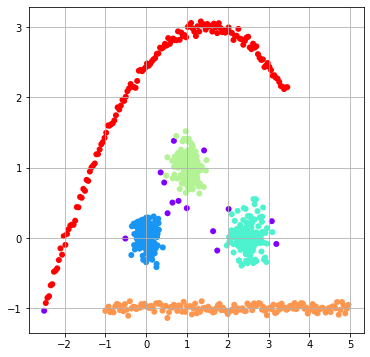

In [334]:
X = [[random.randn()/6, random.randn()/6] for i in range(150)]
X.extend([[random.randn()/4 + 2.5, random.randn()/5] for i in range(150)])
X.extend([[random.randn()/5 + 1, random.randn()/5 + 1] for i in range(150)])
X.extend([[i/25 - 1, + random.randn()/20 - 1] for i in range(150)])
X.extend([[i/25 - 2.5, 3 - (i/50 - 2)**2 + random.randn()/20] for i in range(150)])
    
X = np.array(X)

model = DBSCAN(eps=0.2, min_samples=4).fit(X)

# plots
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=model.labels_, cmap='rainbow', edgecolors= 'none')
plt.grid()